In [1]:
import glob,os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import csv

(184, 184, 1)
/srv/home/chenyu/Al2O3_simulation/Test/*slice0_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice1_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice2_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice3_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice4_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice5_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice6_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice7_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice8_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice9_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice10_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice11_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice12_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice13_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice14_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice15_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice16_*.npy
/srv/home/chenyu/Al2O3_simulation/Test/*slice17_*.npy
/srv/home/chenyu/Al2O3_s

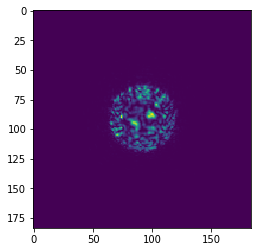

In [44]:
path = '/srv/home/chenyu/Al2O3_simulation/Test/'
nslice = 125
sample = np.load(path + 'Al2O3_slice40_X5_Y13_FPavg.npy')
print(sample.shape)
plt.imshow(np.squeeze(sample))
PACBED_stack = np.zeros((184,184,nslice))
for islice in range(nslice):
    file_pattern = path + '*slice' + str(islice) + '_*.npy'
    print(file_pattern)
    file_list = glob.glob(file_pattern)
    for ifile in range(len(file_list)):
        PACBED_stack[:,:,islice] = PACBED_stack[:,:,islice] + np.squeeze(np.load(file_list[ifile]))

In [46]:
np.save(path+'PACBED_stack.npy',PACBED_stack)

In [13]:
def readCBEDfromMRC(fname):
    f = open(fname, 'rb')
    count = 10
    b = f.read(count*4)
    data_types = {0:np.uint8,1:np.intc,2:np.float32,6:np.uint16}
    c = np.frombuffer(b, dtype=np.int32,count=count)
    data_size = c[:3]
    data_type = data_types[c[3]]

    f.seek(1024)

    count = data_size[0]*data_size[1]*data_size[2]
    cbed = f.read(count*4)
    cbed_arr = np.frombuffer(cbed,dtype=data_type,count=count)
    cbed_arr = np.reshape(cbed_arr,tuple(data_size))
    f.close
    f.closed
    return cbed_arr

False

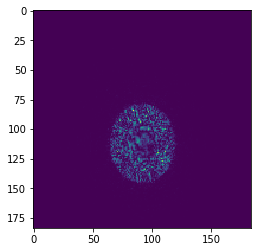

In [30]:
fname = path + 'Al2O3_slice86_X4_Y1_FP1.mrc'
f = open(fname, 'rb')
count = 10
b = f.read(count*4)
data_types = {0:np.uint8,1:np.intc,2:np.float32,6:np.uint16}
c = np.frombuffer(b, dtype=np.int32,count=count)
data_size = c[:3]
data_type = data_types[c[3]]

f.seek(1024)

count = data_size[0]*data_size[1]*data_size[2]
cbed = f.read(count*4)
cbed_arr = np.frombuffer(cbed,dtype=data_type,count=count)
cbed_arr = np.reshape(cbed_arr,(224,184))
plt.imshow(cbed_arr[0:184,0:184])
f.close
f.closed

In [2]:
path = '/srv/home/chenyu/Al2O3_simulation/Test/'
PACBED_stack = np.load(path+'PACBED_stack.npy')

In [3]:
PACBED_stack.shape

(184, 184, 125)

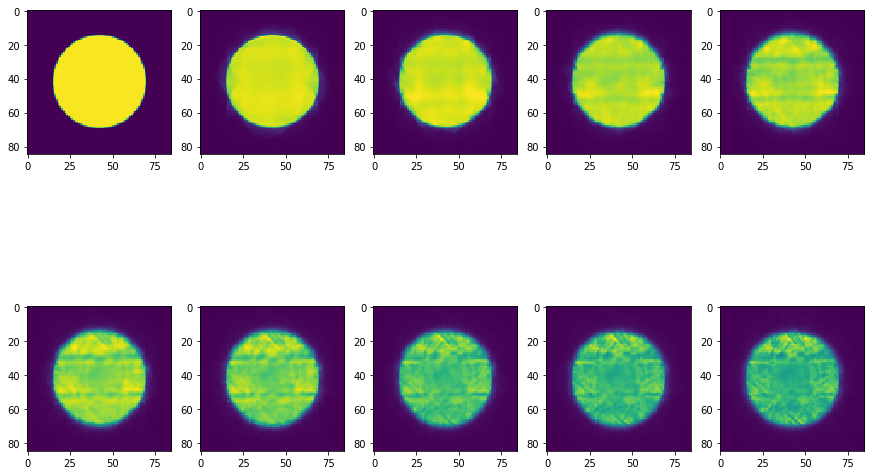

In [17]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(PACBED_stack[50:135,50:135,i*10])